The purpose of this notebook is to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to train a simple linear regression model on a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, we generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
a, b = -1, 2
x = np.linspace(0, 20)
y = a*x+b

x = x.reshape(-1, 1)
y = y.reshape(-1,1) 
print("x shape: {}\ty shape: {}".format(x.shape, y.shape))

x shape: (50, 1)	y shape: (50, 1)


#### Plot the data points. 

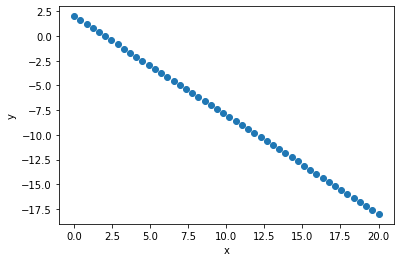

In [3]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**The following functions will be used for all optimizers**

In [4]:
def hypothesis(features, theta_vector):
    return features@theta_vector

In [5]:
def costFunction(predicted_output, actual_output):
    m = actual_output.shape[0]  #Number of observations
    return ( 1/(2*m) )*( np.linalg.norm(predicted_output-actual_output, 2)**2 )

In [6]:
def gradient(features, predicted_output, actual_output):
    m = actual_output.shape[0]  #Number of observations
    return (1/m)*features.T@(predicted_output-actual_output)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

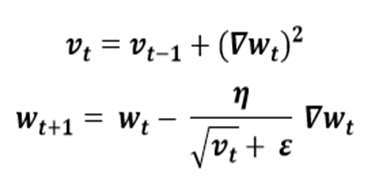

In [7]:
def update_parameters_adagrad(theta_vect, accumulatedGrad_vect, gradient_vect, learning_rate, epsilon):
    accumulatedGrad_vect = accumulatedGrad_vect+ learning_rate*(gradient_vect**2)
    theta_vect = theta_vect - (learning_rate/(accumulatedGrad_vect**0.5+epsilon)) * gradient_vect
    return (theta_vect, accumulatedGrad_vect)

In [8]:
def Adagrad_batch(features, actual_output, theta_vector=np.array([0,0]).reshape(-1,1), learning_rate=0.001, epsilon = 1e-8, max_iter = 1000, cost_tolerence=1e-8, grad_tolerence=0.001):
    
    #Add x0 (ones) column to the features
    x0 = np.ones((features.shape[0],1))
    features = np.append(x0, features, axis=1)
    
    terminate = False
    n_iter = 1
    vt_vector = np.zeros(theta_vector.shape) #initial accumulated gradient to 0
    
    #Lists to store generated values of each iteration
    all_theta0 = []
    all_theta1 = []
    all_cost = []
    all_predicted = []
    
    #append initial values of theta
    all_theta0.append(theta_vector[0])
    all_theta1.append(theta_vector[1])
    
    while n_iter<max_iter:
        n_iter += 1
        
        #calculated the predicted values
        predicted_output = hypothesis(features, theta_vector)
        all_predicted.append(predicted_output)
    
        #calculate cost
        cost = costFunction(predicted_output, actual_output)
        all_cost.append(cost)
        
        #calculate gradient
        grad_vector = gradient(features, predicted_output, actual_output)
        #update parameters
        theta_vector, vt_vector = update_parameters_adagrad(theta_vector, vt_vector, grad_vector, learning_rate, epsilon)
        all_theta0.append(theta_vector[0])
        all_theta1.append(theta_vector[1])
        
        #Terminate at convergence
        if (np.linalg.norm(grad_vector,2) < grad_tolerence):
            print("Terminating due to convergence")
            terminate = True
            break
        
        #Terminate if theere is no more considerable update
        if (len(all_cost)>=2):
            if (abs(all_cost[-1] - all_cost[-2]) <= cost_tolerence):
                print("Terminating due to stop of updates")
                terminate = True
                break
         
        
        
    
    predicted_output = hypothesis(features, theta_vector)
    all_predicted.append(predicted_output)

    cost = costFunction(predicted_output, actual_output)
    all_cost.append(cost)
    
    if terminate == False:
        print("Terminate due to max number of iterations")
    
    return (all_theta0, all_theta1, all_cost, all_predicted, theta_vector, n_iter)

In [9]:
def results_adagrad(alpha, epsilon, features, actual_output, all_predicted_output, all_theta_0, all_theta_1, loss, iterations):
    
    R2_score = metrics.r2_score(actual_output, all_predicted_output[-1])
    print("R2 score = {}, in {} iterations: ".format(R2_score, iterations))


    plt.plot(range(iterations),loss)
    plt.xlabel("# Epochs")
    plt.ylabel("Loss")
    plt.title(r'$\alpha =  {}, \epsilon =  {}$'.format(alpha, epsilon))
    plt.show()


    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.plot(all_theta_0,loss)
    plt.xlabel("Theta 0")
    plt.ylabel("Loss")
    plt.title(r'$\alpha =  {}, \epsilon =  {}$'.format(alpha, epsilon))

    plt.subplot(1, 2, 2)
    plt.plot(all_theta_1,loss)
    plt.xlabel("Theta 1")
    plt.ylabel("Loss")
    plt.title(r'$\alpha =  {}, \epsilon =  {}$'.format(alpha, epsilon))
    plt.show()


    plt.scatter(features,actual_output)
    for i in range(iterations):
        plt.plot(features, all_predicted_output[i])

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("All regression lines")
    plt.show()

    plt.scatter(x,y)
    plt.plot(features, all_predicted_output[-1], c='r')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("best regression line")
    plt.show()

## Adagrad - 1st Trial

In [10]:
adagrad_alpha, adagrad_epsilon = 0.1, 1e-8
adagrad_all_theta0, adagrad_all_theta1, adagrad_all_loss, adagrad_all_predicted, adagrad_final_theta , adagrad_n_iter = Adagrad_batch(x,y, learning_rate=adagrad_alpha, epsilon=adagrad_epsilon, max_iter=2000)
print(f'theta0 shape {len(adagrad_all_theta0)}, theta1 shape {len(adagrad_all_theta1)},\nloss shape {len(adagrad_all_loss)}, pred shape {len(adagrad_all_predicted)}, final theta {adagrad_final_theta},\nn_iter {adagrad_n_iter}')

Terminating due to convergence
theta0 shape 997, theta1 shape 997,
loss shape 997, pred shape 997, final theta [[ 1.99708929]
 [-0.99977866]],
n_iter 997


R2 score = 0.9999999369932807, in 997 iterations: 


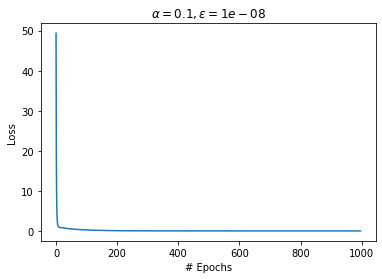

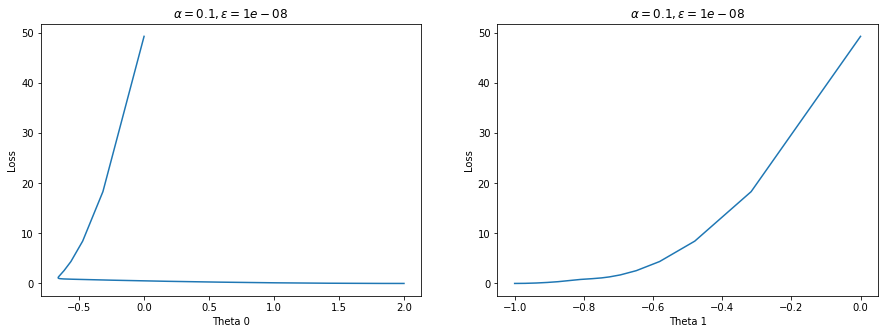

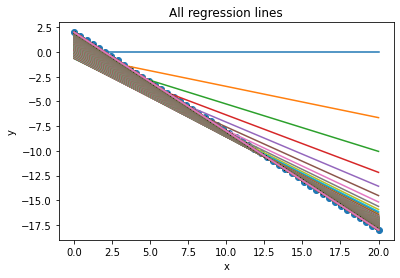

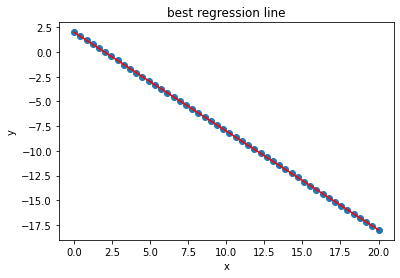

In [11]:
results_adagrad(adagrad_alpha, adagrad_epsilon, x, y, adagrad_all_predicted, adagrad_all_theta0, adagrad_all_theta1, adagrad_all_loss, adagrad_n_iter)

## Adagrad - 2nd Trial
purpose: trying to achieve convergence in fewer number of iterations by increasing the learning rate ($\alpha$)

In [12]:
adagrad_alpha, adagrad_epsilon = 0.5, 1e-8
adagrad_all_theta0, adagrad_all_theta1, adagrad_all_loss, adagrad_all_predicted, adagrad_final_theta , adagrad_n_iter = Adagrad_batch(x,y, learning_rate=adagrad_alpha, epsilon=adagrad_epsilon, max_iter=2000)
print(f'theta0 shape {len(adagrad_all_theta0)}, theta1 shape {len(adagrad_all_theta1)},\nloss shape {len(adagrad_all_loss)}, pred shape {len(adagrad_all_predicted)}, final theta {adagrad_final_theta},\nn_iter {adagrad_n_iter}')

Terminating due to convergence
theta0 shape 348, theta1 shape 348,
loss shape 348, pred shape 348, final theta [[ 1.99715307]
 [-0.99978349]],
n_iter 348


R2 score = 0.9999999397237095, in 348 iterations: 


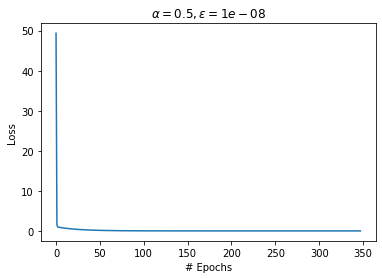

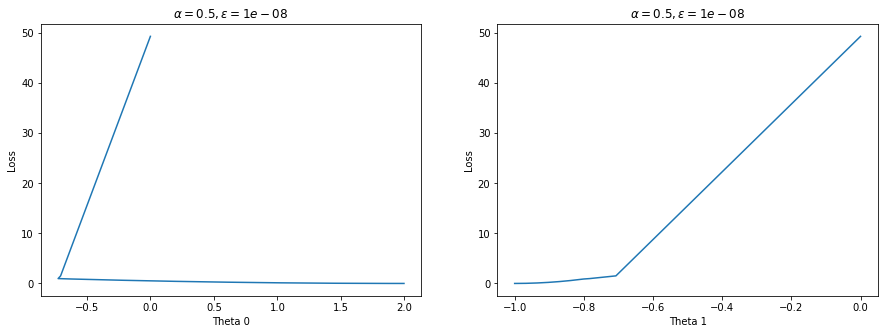

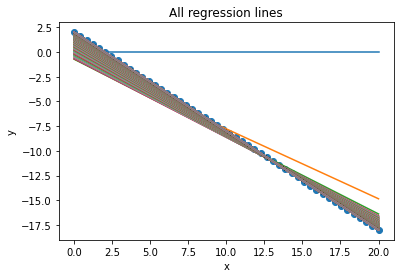

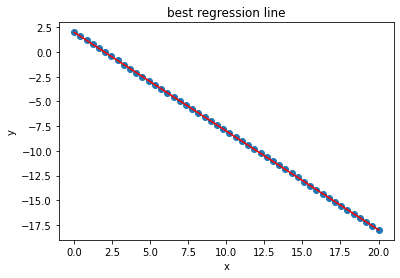

In [13]:
results_adagrad(adagrad_alpha, adagrad_epsilon, x, y, adagrad_all_predicted, adagrad_all_theta0, adagrad_all_theta1, adagrad_all_loss, adagrad_n_iter)

## RMSProp

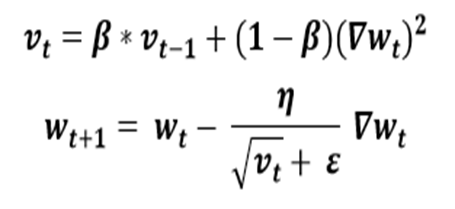

In [14]:
def update_parameters_RMSProp(theta_vect, accumulatedGrad_vect, gradient_vect, learning_rate, beta, epsilon):
    accumulatedGrad_vect = beta*accumulatedGrad_vect+ (1-beta)*(gradient_vect**2)
    theta_vect = theta_vect - (learning_rate/(accumulatedGrad_vect**0.5+epsilon)) * gradient_vect
    return (theta_vect, accumulatedGrad_vect)

In [15]:
def RMSProp_batch(features, actual_output, theta_vector=np.array([0,0]).reshape(-1,1), learning_rate=0.001, beta=0.9, epsilon=1e-8, max_iter = 1000, cost_tolerence=1e-8, grad_tolerence=0.001):
    
    #Add x0 (ones) column to the features
    x0 = np.ones((features.shape[0],1))
    features = np.append(x0, features, axis=1)
    
    terminate = False
    n_iter = 1
    vt_vector = np.zeros(theta_vector.shape) #initial accumulated gradient to 0
    
    #Lists to store generated values of each iteration
    all_theta0 = []
    all_theta1 = []
    all_cost = []
    all_predicted = []
    
    #append initial values of theta
    all_theta0.append(theta_vector[0])
    all_theta1.append(theta_vector[1])
    
    while n_iter<max_iter:
        n_iter += 1
        
        #calculated the predicted values
        predicted_output = hypothesis(features, theta_vector)
        all_predicted.append(predicted_output)
    
        #calculate cost
        cost = costFunction(predicted_output, actual_output)
        all_cost.append(cost)
        
        #calculate gradient
        grad_vector = gradient(features, predicted_output, actual_output)
        #update parameters
        theta_vector, vt_vector = update_parameters_RMSProp(theta_vector, vt_vector, grad_vector, learning_rate, beta, epsilon)
        all_theta0.append(theta_vector[0])
        all_theta1.append(theta_vector[1])
        
        #Terminate at convergence
        if (np.linalg.norm(grad_vector,2) < grad_tolerence):
            print("Terminating due to convergence")
            terminate= True
            break
            
        #Terminate if theere is no more considerable update
        
        if ( len(all_cost)>=2 and ( abs(all_cost[-1] - all_cost[-2]) ) <= cost_tolerence):
            print("Terminating due to stop of updates")
            terminate = True
            break
         
        
        
    
    predicted_output = hypothesis(features, theta_vector)
    all_predicted.append(predicted_output)

    cost = costFunction(predicted_output, actual_output)
    all_cost.append(cost)
    
    if terminate == False:
        print("Terminate due to reaching max number of iterations")
    
    return (all_theta0, all_theta1, all_cost, all_predicted, theta_vector, n_iter)

In [16]:
def results_RMSProp(alpha, beta, epsilon, features, actual_output, all_predicted_output, all_theta_0, all_theta_1, loss, iterations):
    
    R2_score = metrics.r2_score(actual_output, all_predicted_output[-1])
    print("R2 score = {}, in {} iterations: ".format(R2_score, iterations))


    plt.plot(range(iterations),loss)
    plt.xlabel("# Epochs")
    plt.ylabel("Loss")
    plt.title(r'$\alpha =  {},\beta = {}, \epsilon = {}$'.format(alpha, beta, epsilon))
    plt.show()


    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.plot(all_theta_0,loss)
    plt.xlabel("Theta 0")
    plt.ylabel("Loss")
    plt.title(r'$\alpha =  {},\beta = {}, \epsilon = {}$'.format(alpha, beta, epsilon))

    plt.subplot(1, 2, 2)
    plt.plot(all_theta_1,loss)
    plt.xlabel("Theta 1")
    plt.ylabel("Loss")
    plt.title(r'$\alpha =  {},\beta = {}, \epsilon = {}$'.format(alpha, beta, epsilon))
    plt.show()


    plt.scatter(features,actual_output)
    for i in range(iterations):
        plt.plot(features, all_predicted_output[i])

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("All regression lines")
    plt.show()

    plt.scatter(x,y)
    plt.plot(features, all_predicted_output[-1], c='r')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("best regression line")
    plt.show()

## RMSProp - 1st Trial

In [17]:
rmsprop_alpha, rmsprop_beta, rmsprop_epsilon = 0.01, 0.99, 1e-8
rmsprop_all_theta0, rmsprop_all_theta1, rmsprop_all_loss, rmsprop_all_predicted, rmsprop_final_theta , rmsprop_n_iter = RMSProp_batch(x,y, learning_rate=rmsprop_alpha, beta=rmsprop_beta, epsilon=rmsprop_epsilon, max_iter=2000)
print(f'theta0 shape {len(rmsprop_all_theta0)}, theta1 shape {len(rmsprop_all_theta1)},\nloss shape {len(rmsprop_all_loss)}, pred shape {len(rmsprop_all_predicted)}, final theta {rmsprop_final_theta},\nn_iter {rmsprop_n_iter}')

Terminating due to convergence
theta0 shape 770, theta1 shape 770,
loss shape 770, pred shape 770, final theta [[ 1.99671821]
 [-0.99975244]],
n_iter 770


R2 score = 0.9999999199805918, in 770 iterations: 


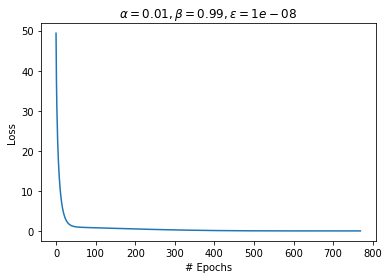

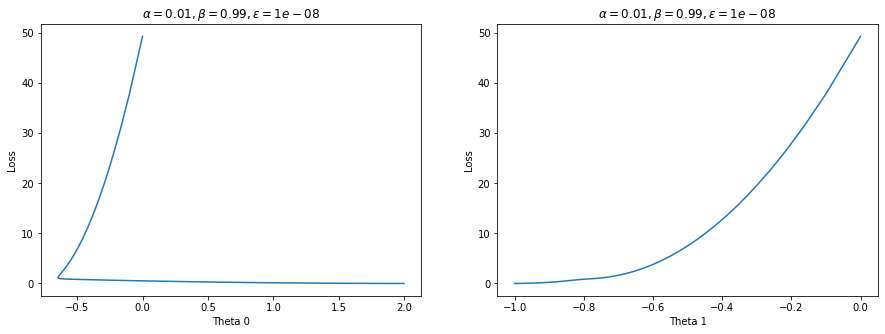

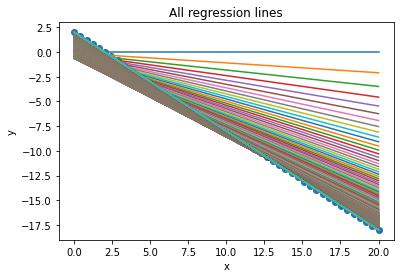

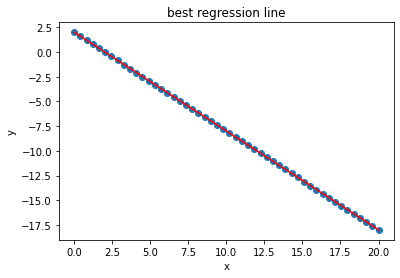

In [18]:
results_RMSProp(rmsprop_alpha, rmsprop_beta, rmsprop_epsilon, x, y, rmsprop_all_predicted, rmsprop_all_theta0, rmsprop_all_theta1, rmsprop_all_loss, rmsprop_n_iter)


## RMSProp - 2nd Trial
purpose: achieving faster convergence by increasing the learning rate $\alpha$ 



In [19]:
rmsprop_alpha, rmsprop_beta, rmsprop_epsilon = 0.1, 0.99, 1e-8
rmsprop_all_theta0, rmsprop_all_theta1, rmsprop_all_loss, rmsprop_all_predicted, rmsprop_final_theta , rmsprop_n_iter = RMSProp_batch(x,y, learning_rate=rmsprop_alpha, beta=rmsprop_beta, epsilon=rmsprop_epsilon, max_iter=2000)
print(f'theta0 shape {len(rmsprop_all_theta0)}, theta1 shape {len(rmsprop_all_theta1)},\nloss shape {len(rmsprop_all_loss)}, pred shape {len(rmsprop_all_predicted)}, final theta {rmsprop_final_theta},\nn_iter {rmsprop_n_iter}')

Terminating due to convergence
theta0 shape 166, theta1 shape 166,
loss shape 166, pred shape 166, final theta [[ 1.9973841]
 [-0.9998012]],
n_iter 166


R2 score = 0.9999999491143996, in 166 iterations: 


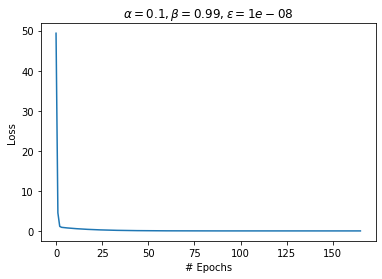

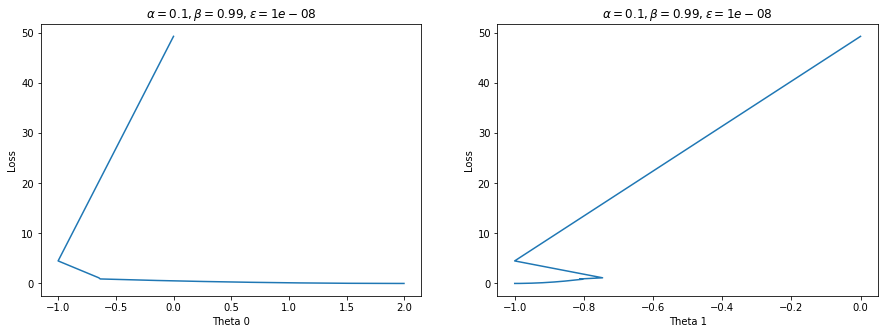

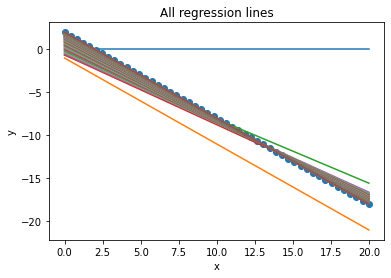

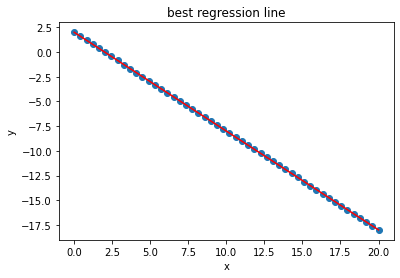

In [20]:
results_RMSProp(rmsprop_alpha, rmsprop_beta, rmsprop_epsilon, x, y, rmsprop_all_predicted, rmsprop_all_theta0, rmsprop_all_theta1, rmsprop_all_loss, rmsprop_n_iter)


## Adam

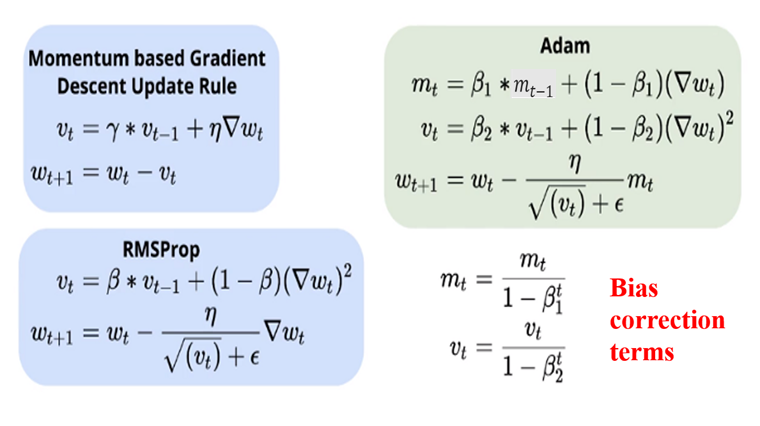

In [21]:
def bias_correction(parameter, beta, t):
    return parameter/(1-(beta**t))

In [22]:
def update_parameters_adam(theta_vect, accumulatedGrad_vect, beta1, momentum_vect, beta2, gradient_vect, learning_rate, epsilon, t):
    momentum_vect = beta1*momentum_vect+(1-beta1)*gradient_vect
    momentum_vect = bias_correction(momentum_vect, beta1, t)
    
    accumulatedGrad_vect = accumulatedGrad_vect+ (1-beta2)*(gradient_vect**2)
    accumulatedGrad_vect = bias_correction(accumulatedGrad_vect, beta2, t)
    
    theta_vect = theta_vect - (learning_rate/(accumulatedGrad_vect**0.5+epsilon)) * momentum_vect
    return (theta_vect, accumulatedGrad_vect, momentum_vect)

In [23]:
def Adam_batch(features, actual_output, theta_vector=np.array([0,0]).reshape(-1,1), learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon = 1e-8, max_iter = 2000, cost_tolerence=1e-8, grad_tolerence=0.001):
    
    #Add x0 (ones) column to the features
    x0 = np.ones((features.shape[0],1))
    features = np.append(x0, features, axis=1)
    
    
    terminate = False
    n_iter = 1
    vt_vector = np.zeros(theta_vector.shape) #initialize accumulated gradient to 0
    mt_vector = np.zeros(theta_vector.shape) #initialize momentum to 0
    
    #Lists to store generated values of each iteration
    all_theta0 = []
    all_theta1 = []
    all_cost = []
    all_predicted = []
    
    #append initial values of theta
    all_theta0.append(theta_vector[0])
    all_theta1.append(theta_vector[1])
    
    while n_iter<max_iter:
        
        #calculated the predicted values
        predicted_output = hypothesis(features, theta_vector)
        all_predicted.append(predicted_output)
    
        #calculate cost
        cost = costFunction(predicted_output, actual_output)
        all_cost.append(cost)
        
        #calculate gradient
        grad_vector = gradient(features, predicted_output, actual_output)
        
        #update parameters
        theta_vector, vt_vector, mt_vector = update_parameters_adam(theta_vector, vt_vector, beta1, mt_vector, beta2, grad_vector, learning_rate, epsilon, n_iter)
        all_theta0.append(theta_vector[0])
        all_theta1.append(theta_vector[1])
        
        n_iter += 1
        
        
        #Terminate at convergence
        if (np.linalg.norm(grad_vector,2) < grad_tolerence):
            print("Terminating due to convergence")
            terminate = True
            break
        
        #Terminate if theere is no more considerable update
        if (len(all_cost)>=2):
            if ((abs(all_cost[-1] - all_cost[-2])) <= cost_tolerence):
                print("Terminating due to stop of updates")
                terminate = True
                break
         
        
        
    
    predicted_output = hypothesis(features, theta_vector)
    all_predicted.append(predicted_output)

    cost = costFunction(predicted_output, actual_output)
    all_cost.append(cost)
    
    if terminate == False:
        print("Terminate due to reaching max number of iterations")
    
    return (all_theta0, all_theta1, all_cost, all_predicted, theta_vector, n_iter)

In [24]:
def results_adam(alpha, beta1, beta2, epsilon, features, actual_output, all_predicted_output, all_theta_0, all_theta_1, loss, iterations):
    
    R2_score = metrics.r2_score(actual_output, all_predicted_output[-1])
    print("R2 score = {}, in {} iterations: ".format(R2_score, iterations))


    plt.plot(range(iterations),loss)
    plt.xlabel("# Epochs")
    plt.ylabel("Loss")
    plt.title(r'$\alpha =  {},\beta_1 = {},\beta_2 = {}, \epsilon = {} $'.format(alpha, beta1, beta2, epsilon))
    plt.show()


    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.plot(all_theta_0,loss)
    plt.xlabel("Theta 0")
    plt.ylabel("Loss")
    plt.title(r'$\alpha =  {},\beta_1 = {},\beta_2 = {}, \epsilon = {} $'.format(alpha, beta1, beta2, epsilon))

    plt.subplot(1, 2, 2)
    plt.plot(all_theta_1,loss)
    plt.xlabel("Theta 1")
    plt.ylabel("Loss")
    plt.title(r'$\alpha =  {},\beta_1 = {},\beta_2 = {}, \epsilon = {} $'.format(alpha, beta1, beta2, epsilon))
    plt.show()


    plt.scatter(features,actual_output)
    for i in range(iterations):
        plt.plot(features, all_predicted_output[i])

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("All regression lines")
    plt.show()

    plt.scatter(x,y)
    plt.plot(features, all_predicted_output[-1], c='r')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("best regression line")
    plt.show()

## Adam - 1st Trial

In [25]:
adam_alpha, adam_beta1, adam_beta2, adam_epsilon = 0.5, 0.6, 0.3, 1e-8
adam_all_theta0, adam_all_theta1, adam_all_loss, adam_all_predicted, adam_final_theta , adam_n_iter = Adam_batch(x,y, learning_rate=adam_alpha, beta1=adam_beta1, beta2=adam_beta2, epsilon=adam_epsilon, max_iter=3000)
print(f'theta0 shape {len(adam_all_theta0)}, theta1 shape {len(adam_all_theta1)},\nloss shape {len(adam_all_loss)}, pred shape {len(adam_all_predicted)}, final theta {adam_final_theta},\nn_iter {adam_n_iter}')

Terminating due to convergence
theta0 shape 859, theta1 shape 859,
loss shape 859, pred shape 859, final theta [[ 1.99699738]
 [-0.99977205]],
n_iter 859


R2 score = 0.9999999329668542, in 859 iterations: 


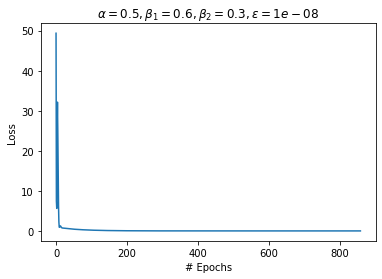

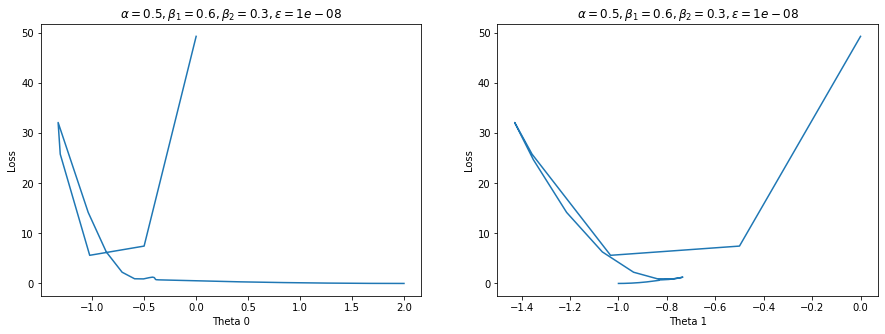

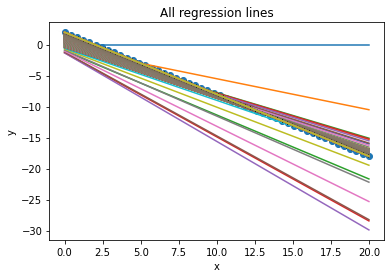

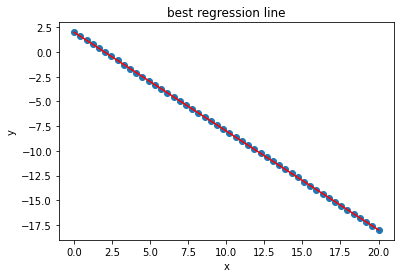

In [26]:
results_adam(adam_alpha, adam_beta1, adam_beta2, adam_epsilon, x, y, adam_all_predicted, adam_all_theta0, adam_all_theta1, adam_all_loss, adam_n_iter)


## Adam - 2nd Trial
purpose: reduce overshooting by reducing the number of points that affects the accumulation of momentum ($\beta_1$)

In [27]:
adam_alpha, adam_beta1, adam_beta2, adam_epsilon = 0.5, 0.1, 0.3, 1e-8
adam_all_theta0, adam_all_theta1, adam_all_loss, adam_all_predicted, adam_final_theta , adam_n_iter = Adam_batch(x,y, learning_rate=adam_alpha, beta1=adam_beta1, beta2=adam_beta2, epsilon=adam_epsilon, max_iter=3000)
print(f'theta0 shape {len(adam_all_theta0)}, theta1 shape {len(adam_all_theta1)},\nloss shape {len(adam_all_loss)}, pred shape {len(adam_all_predicted)}, final theta {adam_final_theta},\nn_iter {adam_n_iter}')

Terminating due to convergence
theta0 shape 541, theta1 shape 541,
loss shape 541, pred shape 541, final theta [[ 1.99716204]
 [-0.99978408]],
n_iter 541


R2 score = 0.9999999400987751, in 541 iterations: 


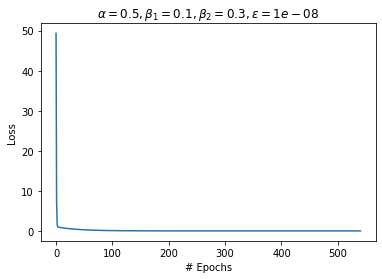

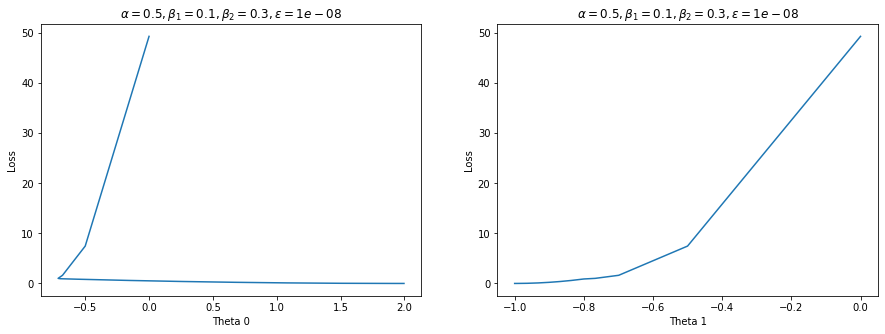

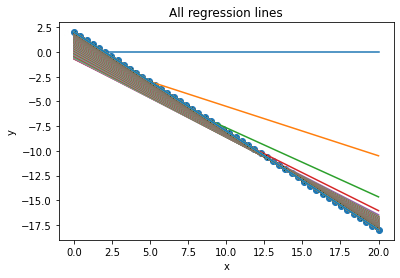

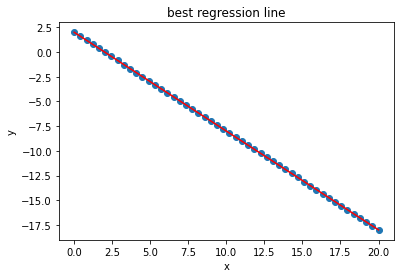

In [28]:
results_adam(adam_alpha, adam_beta1, adam_beta2, adam_epsilon, x, y, adam_all_predicted, adam_all_theta0, adam_all_theta1, adam_all_loss, adam_n_iter)


# Comparing all optimizers with the same hyperparameters

In [29]:
unified_alpha, unified_momentAcc, unified_gradAcc, unified_epsilon = 0.1, 0.02, 0.9, 1e-8
maximum_iter = 2000

Adagrad Optimizer
------------------------------------

Terminating due to convergence
R2 score = 0.9999999369932807, in 997 iterations: 


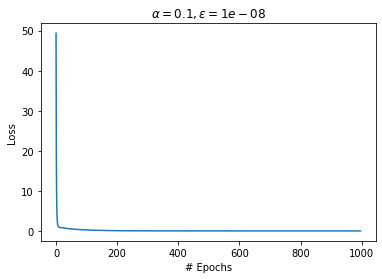

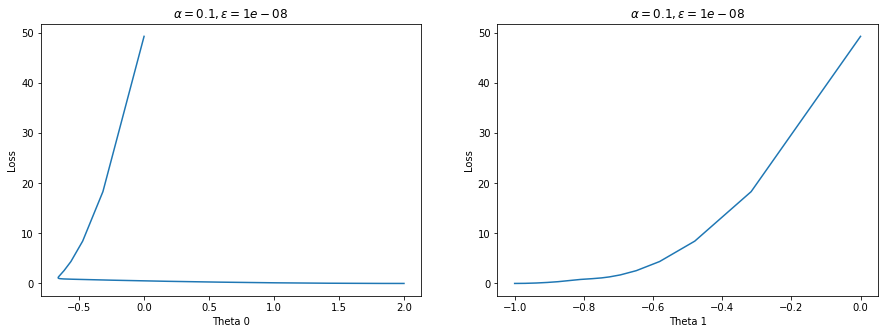

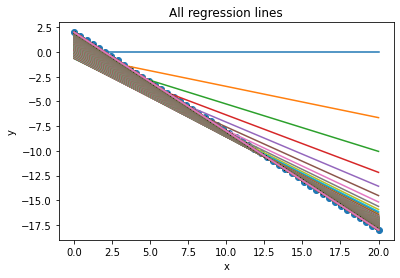

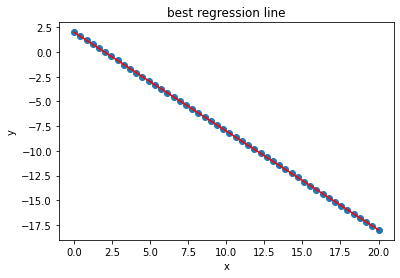




RMSProp Optimizer
------------------------------------

Terminating due to stop of updates
R2 score = 0.9887808728974623, in 363 iterations: 


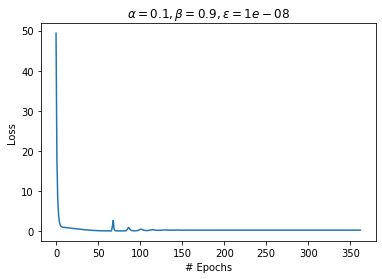

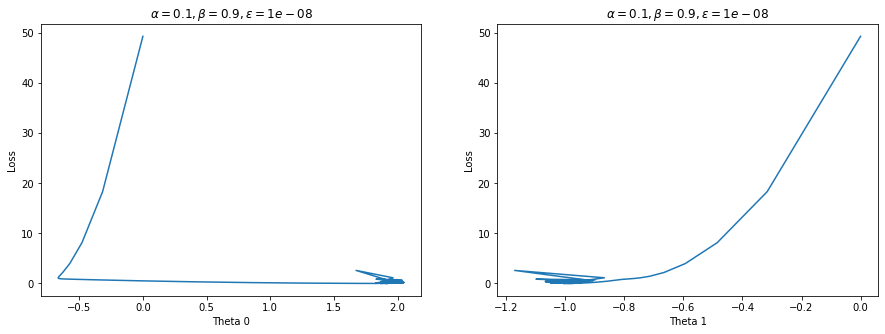

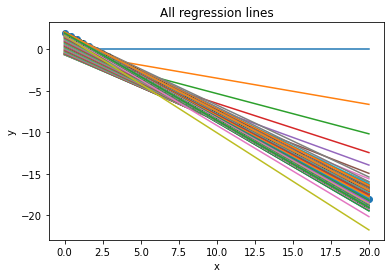

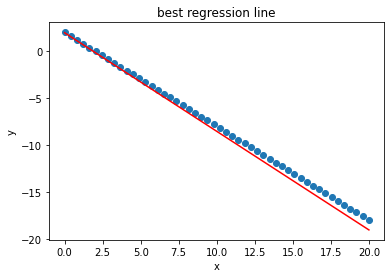




Adam Optimizer
------------------------------------

Terminate due to reaching max number of iterations
R2 score = 0.6593891318891364, in 2000 iterations: 


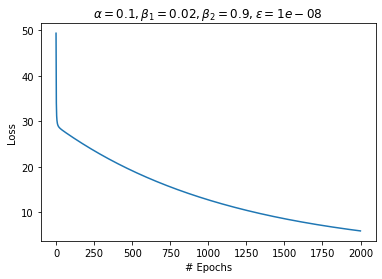

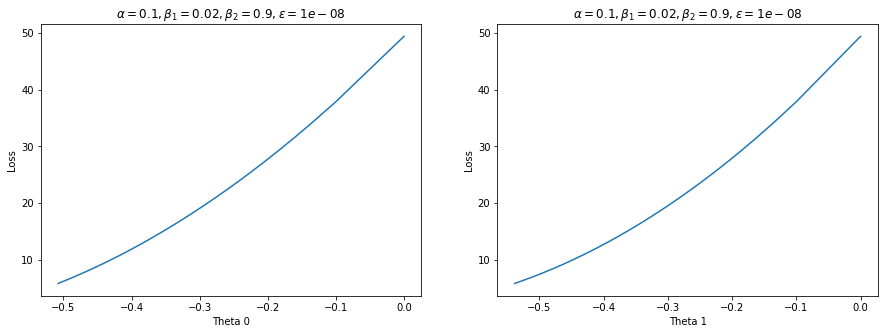

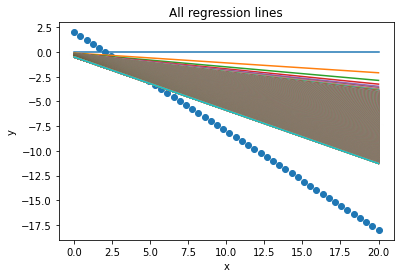

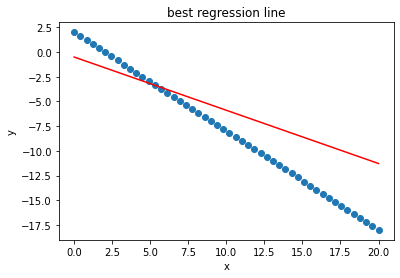

In [30]:
print('Adagrad Optimizer\n------------------------------------\n')
adagrad_all_theta0, adagrad_all_theta1, adagrad_all_loss, adagrad_all_predicted, adagrad_final_theta , adagrad_n_iter = Adagrad_batch(x,y, learning_rate=unified_alpha, epsilon=unified_epsilon, max_iter=maximum_iter)
results_adagrad(unified_alpha, unified_epsilon, x, y, adagrad_all_predicted, adagrad_all_theta0, adagrad_all_theta1, adagrad_all_loss, adagrad_n_iter)

print('===========================================================================\n\n\n')
print('RMSProp Optimizer\n------------------------------------\n')
rmsprop_all_theta0, rmsprop_all_theta1, rmsprop_all_loss, rmsprop_all_predicted, rmsprop_final_theta , rmsprop_n_iter = RMSProp_batch(x,y, learning_rate=unified_alpha, beta=unified_gradAcc, epsilon=unified_epsilon, max_iter=maximum_iter)
results_RMSProp(unified_alpha, unified_gradAcc, unified_epsilon, x, y, rmsprop_all_predicted, rmsprop_all_theta0, rmsprop_all_theta1, rmsprop_all_loss, rmsprop_n_iter)


print('===========================================================================\n\n\n')
print('Adam Optimizer\n------------------------------------\n')
adam_all_theta0, adam_all_theta1, adam_all_loss, adam_all_predicted, adam_final_theta , adam_n_iter = Adam_batch(x,y, learning_rate=unified_alpha, beta1=unified_momentAcc, beta2=unified_gradAcc, epsilon=unified_epsilon, max_iter=maximum_iter)

results_adam(unified_alpha, unified_momentAcc, unified_gradAcc, unified_epsilon, x, y, adam_all_predicted, adam_all_theta0, adam_all_theta1, adam_all_loss, adam_n_iter)
